In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv("../../labelled_data/combined/imputed_combined.csv")

In [3]:
df

,Unnamed: 0.1,Unnamed: 0_x,Rndrng_Prvdr_Crdntls,Rndrng_Prvdr_Gndr,Rndrng_Prvdr_Type,Rndrng_Prvdr_Mdcr_Prtcptg_Ind,Tot_HCPCS_Cds,Tot_Benes_x,Tot_Srvcs,Tot_Sbmtd_Chrg,...,Bene_CC_Hyplpdma_Pct_y,Bene_CC_Hyprtnsn_Pct_y,Bene_CC_IHD_Pct_y,Bene_CC_Opo_Pct_y,Bene_CC_RAOA_Pct_y,Bene_CC_Sz_Pct_y,Bene_CC_Strok_Pct_y,Bene_Avg_Risk_Scre,Fraud,FraudType
0,0,0,7310,0.0,39,1,16.0,291.0,764.0,402812.00,...,0.75,0.75,0.32,0.00,0.64,0.0,0.00,3.729650,0,0
1,1,5,9043,0.0,24,1,34.0,251.0,660.0,149315.45,...,0.73,0.75,0.39,0.00,0.58,0.0,0.00,1.654308,0,0
2,2,6,4737,1.0,39,1,35.0,359.0,1400.0,238600.00,...,0.74,0.75,0.53,0.00,0.68,0.0,0.00,1.894526,0,0
3,3,7,7895,0.0,91,1,92.0,739.0,3916.0,777162.00,...,0.54,0.69,0.48,0.00,0.75,0.0,0.00,2.173167,0,0
4,4,14,9043,1.0,24,1,43.0,285.0,922.0,139700.00,...,0.64,0.74,0.44,0.15,0.50,0.0,0.00,1.942227,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334369,334369,1100715,9043,1.0,39,1,37.0,365.0,2272.0,587582.00,...,0.75,0.75,0.50,0.40,0.57,0.0,0.00,2.350335,0,0
334370,334370,1100717,7310,0.0,24,1,50.0,138.0,769.0,109972.88,...,0.75,0.75,0.00,0.00,0.52,0.0,0.00,1.382273,0,0
334371,334371,1100719,3446,0.0,39,1,34.0,1215.0,6097.0,696266.98,...,0.60,0.73,0.66,0.14,0.47,0.0,0.07,2.096019,0,0
334372,334372,1100722,7310,1.0,39,1,40.0,333.0,1093.0,182515.00,...,0.75,0.75,0.35,0.00,0.57,0.0,0.00,1.451024,0,0


In [4]:
cols = ['Rndrng_Prvdr_Crdntls',
'Rndrng_Prvdr_Gndr', 
'Rndrng_Prvdr_Type',
'Rndrng_Prvdr_Mdcr_Prtcptg_Ind', 
'Tot_HCPCS_Cds', 
'Tot_Benes_x',
'Tot_Srvcs', 
'Tot_Sbmtd_Chrg', 
'Tot_Mdcr_Alowd_Amt',
'Tot_Mdcr_Pymt_Amt', 
'Tot_Mdcr_Stdzd_Amt', 
'Drug_Sprsn_Ind_x',
'Drug_Tot_HCPCS_Cds', 
'Drug_Tot_Benes', 
'Drug_Tot_Srvcs',
'Drug_Sbmtd_Chrg', 
'Drug_Mdcr_Alowd_Amt', 
'Drug_Mdcr_Pymt_Amt',
       'Drug_Mdcr_Stdzd_Amt', 'Med_Sprsn_Ind', 'Med_Tot_HCPCS_Cds',
       'Med_Tot_Benes', 'Med_Tot_Srvcs', 'Med_Sbmtd_Chrg',
       'Med_Mdcr_Alowd_Amt', 'Med_Mdcr_Pymt_Amt', 'Med_Mdcr_Stdzd_Amt',
       'Bene_Avg_Age_x', 'Bene_Age_LT_65_Cnt_x', 'Bene_Age_65_74_Cnt_x',
       'Bene_Age_75_84_Cnt_x', 'Bene_Age_GT_84_Cnt_x', 'Bene_Feml_Cnt_x',
       'Bene_Male_Cnt_x', 'Bene_Race_Wht_Cnt_x', 'Bene_Race_Black_Cnt_x',
       'Bene_Race_API_Cnt', 'Bene_Race_Hspnc_Cnt_x',
       'Bene_Race_NatInd_Cnt', 'Bene_Race_Othr_Cnt_x', 'Bene_Dual_Cnt_x',
       'Bene_Ndual_Cnt_x', 'Bene_CC_AF_Pct_x', 'Bene_CC_Alzhmr_Pct_x',
       'Bene_CC_Asthma_Pct_x', 'Bene_CC_Cncr_Pct_x', 'Bene_CC_CHF_Pct_x',
       'Bene_CC_CKD_Pct_x', 'Bene_CC_COPD_Pct_x', 'Bene_CC_Dprssn_Pct_x',
       'Bene_CC_Dbts_Pct_x', 'Bene_CC_Hyplpdma_Pct_x',
       'Bene_CC_Hyprtnsn_Pct_x', 'Bene_CC_IHD_Pct_x', 'Bene_CC_Opo_Pct_x',
       'Bene_CC_RAOA_Pct_x', 'Bene_CC_Sz_Pct_x', 'Bene_CC_Strok_Pct_x',
       'Bene_Avg_Risk_Scre_x', 'Rndrng_NPI', 'Fraud_x', 'FraudType_x',
'Prscrbr_Crdntls',
       'Prscrbr_Type_src', 'Tot_Clms', 'Tot_30day_Fills',
       'Tot_Drug_Cst', 'Tot_Day_Suply', 'GE65_Sprsn_Flag',
       'GE65_Tot_Clms', 'GE65_Tot_30day_Fills', 'GE65_Tot_Drug_Cst',
       'GE65_Tot_Day_Suply', 'GE65_Bene_Sprsn_Flag', 'GE65_Tot_Benes',
       'Brnd_Sprsn_Flag', 'Brnd_Tot_Clms', 'Brnd_Tot_Drug_Cst',
       'Gnrc_Sprsn_Flag', 'Gnrc_Tot_Clms', 'Gnrc_Tot_Drug_Cst',
       'Othr_Sprsn_Flag', 'Othr_Tot_Clms', 'Othr_Tot_Drug_Cst',
       'MAPD_Sprsn_Flag', 'MAPD_Tot_Clms', 'MAPD_Tot_Drug_Cst',
       'PDP_Sprsn_Flag', 'PDP_Tot_Clms', 'PDP_Tot_Drug_Cst',
       'LIS_Sprsn_Flag', 'LIS_Tot_Clms', 'LIS_Drug_Cst',
       'NonLIS_Sprsn_Flag', 'NonLIS_Tot_Clms', 'NonLIS_Drug_Cst',
       'Opioid_Tot_Clms', 'Opioid_Tot_Drug_Cst', 'Opioid_Tot_Suply',
       'Opioid_Tot_Benes', 'Opioid_Prscrbr_Rate', 'Opioid_LA_Tot_Clms',
       'Opioid_LA_Tot_Drug_Cst', 'Opioid_LA_Tot_Suply',
       'Opioid_LA_Tot_Benes', 'Opioid_LA_Prscrbr_Rate', 'Antbtc_Tot_Clms',
       'Antbtc_Tot_Drug_Cst', 'Antbtc_Tot_Benes',
       'Antpsyct_GE65_Sprsn_Flag', 'Antpsyct_GE65_Tot_Clms',
       'Antpsyct_GE65_Tot_Drug_Cst', 'Antpsyct_GE65_Tot_Benes',
       'Bene_Race_Api_Cnt_x', 
       'Bene_Race_Natind_Cnt_x', 
       'Rfrg_Prvdr_Type_Flag', 'Tot_Suplrs', 'Tot_Suplr_HCPCS_Cds',
       'Tot_Suplr_Benes', 'Tot_Suplr_Clms', 'Tot_Suplr_Srvcs',
       'Suplr_Sbmtd_Chrgs', 'Suplr_Mdcr_Alowd_Amt', 'Suplr_Mdcr_Pymt_Amt',
       'Suplr_Mdcr_Stdzd_Pymt_Amt', 'DME_Sprsn_Ind', 'DME_Tot_Suplrs',
       'DME_Tot_Suplr_HCPCS_Cds', 'DME_Tot_Suplr_Benes',
       'DME_Tot_Suplr_Clms', 'DME_Tot_Suplr_Srvcs',
       'DME_Suplr_Sbmtd_Chrgs', 'DME_Suplr_Mdcr_Alowd_Amt',
       'DME_Suplr_Mdcr_Pymt_Amt', 'DME_Suplr_Mdcr_Stdzd_Pymt_Amt',
       'POS_Sprsn_Ind', 'POS_Tot_Suplrs', 'POS_Tot_Suplr_HCPCS_Cds',
       'POS_Tot_Suplr_Benes', 'POS_Tot_Suplr_Clms', 'POS_Tot_Suplr_Srvcs',
       'POS_Suplr_Sbmtd_Chrgs', 'POS_Suplr_Mdcr_Alowd_Amt',
       'POS_Suplr_Mdcr_Pymt_Amt', 'POS_Suplr_Mdcr_Stdzd_Pymt_Amt',
       'Drug_Tot_Suplrs', 'Drug_Tot_Suplr_HCPCS_Cds',
       'Drug_Tot_Suplr_Benes', 'Drug_Tot_Suplr_Clms',
       'Drug_Tot_Suplr_Srvcs', 'Drug_Suplr_Sbmtd_Chrgs',
       'Drug_Suplr_Mdcr_Alowd_Amt', 'Drug_Suplr_Mdcr_Pymt_Amt',
       'Drug_Suplr_Mdcr_Stdzd_Pymt_Amt', 'Bene_Avg_Age',
       'Fraud', 'FraudType']

In [5]:
df = df[cols]

In [6]:
df

,Rndrng_Prvdr_Crdntls,Rndrng_Prvdr_Gndr,Rndrng_Prvdr_Type,Rndrng_Prvdr_Mdcr_Prtcptg_Ind,Tot_HCPCS_Cds,Tot_Benes_x,Tot_Srvcs,Tot_Sbmtd_Chrg,Tot_Mdcr_Alowd_Amt,Tot_Mdcr_Pymt_Amt,...,Drug_Tot_Suplr_Benes,Drug_Tot_Suplr_Clms,Drug_Tot_Suplr_Srvcs,Drug_Suplr_Sbmtd_Chrgs,Drug_Suplr_Mdcr_Alowd_Amt,Drug_Suplr_Mdcr_Pymt_Amt,Drug_Suplr_Mdcr_Stdzd_Pymt_Amt,Bene_Avg_Age,Fraud,FraudType
0,7310,0.0,39,1,16.0,291.0,764.0,402812.00,85319.63,69175.78,...,0.0,0.0,0.0,0.00,0.00,0.00,0.00,71.300000,0,0
1,9043,0.0,24,1,34.0,251.0,660.0,149315.45,49859.16,34786.35,...,17.0,51.0,2002.0,7051.88,2010.45,1759.72,1738.48,76.060606,0,0
2,4737,1.0,39,1,35.0,359.0,1400.0,238600.00,149023.89,114975.60,...,0.0,0.0,0.0,0.00,0.00,0.00,0.00,73.105263,0,0
3,7895,0.0,91,1,92.0,739.0,3916.0,777162.00,277266.94,210439.56,...,0.0,0.0,0.0,0.00,0.00,0.00,0.00,74.000000,0,0
4,9043,1.0,24,1,43.0,285.0,922.0,139700.00,71391.30,52741.85,...,11.0,18.0,18.0,714.00,594.00,445.62,439.79,68.360000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334369,9043,1.0,39,1,37.0,365.0,2272.0,587582.00,203150.57,157754.65,...,11.0,12.0,12.0,462.00,462.00,339.49,336.31,77.434783,0,0
334370,7310,0.0,24,1,50.0,138.0,769.0,109972.88,53888.01,40893.46,...,11.0,15.0,2387.0,2590.96,752.34,525.13,517.40,70.727273,0,0
334371,3446,0.0,39,1,34.0,1215.0,6097.0,696266.98,513866.65,390895.36,...,16.0,61.0,61.0,7590.00,2046.00,1569.00,1547.27,80.732558,0,0
334372,7310,1.0,39,1,40.0,333.0,1093.0,182515.00,93505.14,68252.03,...,0.0,0.0,0.0,0.00,0.00,0.00,0.00,75.857143,0,0


(267499, 155)
(267499, 1, 155)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 155)               192820    
                                                                 
 dense (Dense)               (None, 128)               19968     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 212917 (831.71 KB)
Trainable params: 212917 (831.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1672/1672 [==============================] - 25s 14ms/step - loss: 0.0060 - accuracy: 0.9980 - val_loss: 0.0020 - val_accuracy: 0.9998
Epoch 2/10
1672/1672 [==============================] - 25s 15ms/step - loss: 0.0018 - accuracy: 0.9998

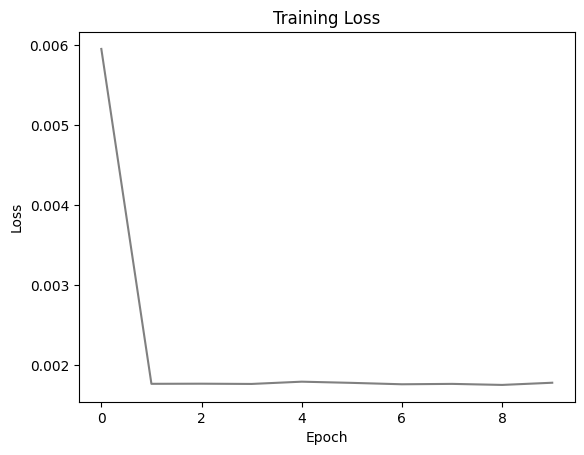

In [7]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

X = df.drop(['Fraud', 'FraudType'], axis=1)
y = df['Fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


timesteps = 1  # You might need to adjust this based on the nature of your data
features = 155
output_dim = 1
print(X_train.shape)
X_train_reshaped = X_train.values.reshape(X_train.shape[0], timesteps, features)
print(X_train_reshaped.shape)
model = Sequential()
model.add(LSTM(units=155, input_shape=(timesteps, features)))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=output_dim, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(X_train_reshaped, y_train, epochs=10, batch_size=128, validation_split=0.2)
plt.plot(history.history['loss'],color="gray")
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [8]:
X_test_reshaped = X_test.values.reshape(X_test.shape[0], timesteps, features)
y_pred = model.predict(X_test_reshaped)
y_pred_binary = (y_pred > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Accuracy: {accuracy:.4f}')

# Generate and print classification report
class_report = classification_report(y_test, y_pred_binary)
print('Classification Report:\n', class_report)

# Generate and print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print('Confusion Matrix:\n', conf_matrix)


2090/2090 [==============================] - 10s 5ms/step
Accuracy: 0.9999
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     66868
           1       0.00      0.00      0.00         7

    accuracy                           1.00     66875
   macro avg       0.50      0.50      0.50     66875
weighted avg       1.00      1.00      1.00     66875

Confusion Matrix:
 [[66868     0]
 [    7     0]]


/Users/sujaykumar/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sujaykumar/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sujaykumar/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [9]:
df = pd.read_csv("../../labelled_data/combined/combined_rus_features.csv")

In [10]:
df = df.drop(["Unnamed: 0","Fraud_x","FraudType_x","Rndrng_NPI",],axis=1)

In [11]:
df

,Rndrng_Prvdr_Crdntls,Rndrng_Prvdr_Gndr,Rndrng_Prvdr_Type,Rndrng_Prvdr_Mdcr_Prtcptg_Ind,Tot_HCPCS_Cds,Tot_Benes_x,Tot_Srvcs,Tot_Sbmtd_Chrg,Tot_Mdcr_Alowd_Amt,Tot_Mdcr_Pymt_Amt,...,Drug_Tot_Suplr_HCPCS_Cds,Drug_Tot_Suplr_Benes,Drug_Tot_Suplr_Clms,Drug_Tot_Suplr_Srvcs,Drug_Suplr_Sbmtd_Chrgs,Drug_Suplr_Mdcr_Alowd_Amt,Drug_Suplr_Mdcr_Pymt_Amt,Drug_Suplr_Mdcr_Stdzd_Pymt_Amt,Bene_Avg_Age,Fraud
0,7310,0.0,39,1,74.0,1151.0,5590.0,918198.14,507797.89,386296.56,...,9.0,17.0,89.0,24152.0,52976.96,17217.87,13571.40,14165.61,78.377049,0
1,9043,0.0,39,1,46.0,292.0,1226.0,80876.37,70357.44,52832.80,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,69.875000,0
2,9043,0.0,39,1,39.0,238.0,848.0,102998.00,46206.69,31988.12,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,77.133333,0
3,12675,1.0,55,1,12.0,303.0,453.0,79186.00,22253.45,12941.94,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,75.636364,0
4,9043,0.0,27,1,47.0,88.0,240.0,243666.00,81219.98,65015.17,...,6.0,12.0,22.0,5692.0,16220.96,3370.72,2599.09,2575.74,60.800000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,9043,0.0,39,1,5.0,27.0,84.0,15185.00,9429.72,5761.06,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,74.333333,1
108,4737,0.0,22,1,15.0,64.0,4799.0,40236.15,16258.35,11187.71,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,66.750000,1
109,7310,0.0,78,1,21.0,781.0,4146.0,998238.00,333015.83,253335.52,...,2.0,34.0,97.0,97.0,5294.00,3300.00,2523.80,2483.52,74.088803,1
110,7310,0.0,26,1,11.0,45.0,94.0,15750.00,11082.67,7841.14,...,4.0,12.0,14.0,1005.0,1924.37,639.00,459.93,422.66,82.625000,1


(89, 152)
(89, 1, 152)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 152)               185440    
                                                                 
 dense_2 (Dense)             (None, 128)               19584     
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 205153 (801.38 KB)
Trainable params: 205153 (801.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: 0.7358 - accuracy: 0.5070 - val_loss: 0.6562 - val_accuracy: 0.6111
Epoch 2/10
1/1 [==============================] - 0s 58ms/step - loss: 0.6855 - accuracy: 0.6338 - val_loss: 0.6055 - 

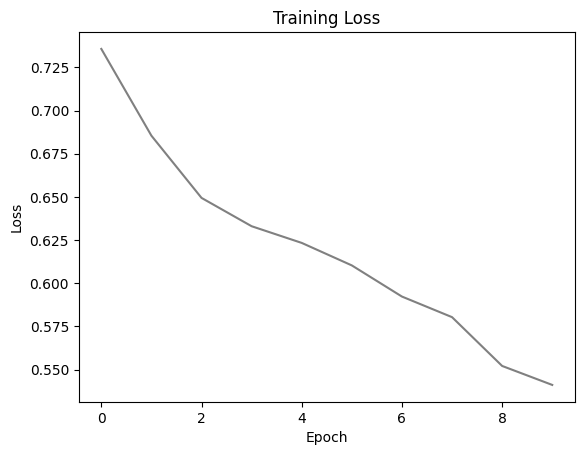

In [12]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

X = df.drop(['Fraud'], axis=1)
y = df['Fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


timesteps = 1  # You might need to adjust this based on the nature of your data
features = 152
output_dim = 1
print(X_train.shape)
X_train_reshaped = X_train.values.reshape(X_train.shape[0], timesteps, features)
print(X_train_reshaped.shape)
model = Sequential()
model.add(LSTM(units=152, input_shape=(timesteps, features)))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=output_dim, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(X_train_reshaped, y_train, epochs=10, batch_size=128, validation_split=0.2)
plt.plot(history.history['loss'],color="gray")
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [13]:
X_test_reshaped = X_test.values.reshape(X_test.shape[0], timesteps, features)
y_pred = model.predict(X_test_reshaped)
y_pred_binary = (y_pred > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Accuracy: {accuracy:.4f}')

# Generate and print classification report
class_report = classification_report(y_test, y_pred_binary)
print('Classification Report:\n', class_report)

# Generate and print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print('Confusion Matrix:\n', conf_matrix)


1/1 [==============================] - 0s 385ms/step
Accuracy: 0.6522
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.53      0.67        15
           1       0.50      0.88      0.64         8

    accuracy                           0.65        23
   macro avg       0.69      0.70      0.65        23
weighted avg       0.75      0.65      0.66        23

Confusion Matrix:
 [[8 7]
 [1 7]]


In [14]:
df = pd.read_csv("../../labelled_data/combined/combined_ros_features.csv")

In [15]:
df = df.drop(["Unnamed: 0","Fraud_x","FraudType_x","Rndrng_NPI",],axis=1)

(534908, 152)
(534908, 1, 152)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 152)               185440    
                                                                 
 dense_4 (Dense)             (None, 128)               19584     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 205153 (801.38 KB)
Trainable params: 205153 (801.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
3344/3344 [==============================] - 66s 19ms/step - loss: 0.5517 - accuracy: 0.7108 - val_loss: 0.5394 - val_accuracy: 0.7496
Epoch 2/10
3344/3344 [==============================] - 63s 19ms/step - loss: 0.5551 - accuracy: 0.71

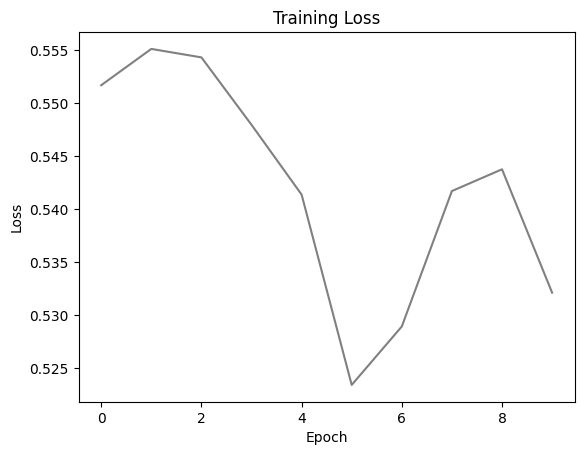

In [16]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

X = df.drop(['Fraud'], axis=1)
y = df['Fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


timesteps = 1  # You might need to adjust this based on the nature of your data
features = 152
output_dim = 1
print(X_train.shape)
X_train_reshaped = X_train.values.reshape(X_train.shape[0], timesteps, features)
print(X_train_reshaped.shape)
model = Sequential()
model.add(LSTM(units=152, input_shape=(timesteps, features)))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=output_dim, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(X_train_reshaped, y_train, epochs=10, batch_size=128, validation_split=0.2)
plt.plot(history.history['loss'],color="gray")
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [17]:
X_test_reshaped = X_test.values.reshape(X_test.shape[0], timesteps, features)
y_pred = model.predict(X_test_reshaped)
y_pred_binary = (y_pred > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Accuracy: {accuracy:.4f}')

# Generate and print classification report
class_report = classification_report(y_test, y_pred_binary)
print('Classification Report:\n', class_report)

# Generate and print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print('Confusion Matrix:\n', conf_matrix)


4179/4179 [==============================] - 20s 5ms/step
Accuracy: 0.7390
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.75      0.74     66792
           1       0.74      0.73      0.74     66936

    accuracy                           0.74    133728
   macro avg       0.74      0.74      0.74    133728
weighted avg       0.74      0.74      0.74    133728

Confusion Matrix:
 [[49838 16954]
 [17944 48992]]


In [18]:
df = pd.read_csv("../../labelled_data/combined/combined_smote_features.csv")

In [19]:
df = df.drop(["Unnamed: 0","Fraud_x","FraudType_x","Rndrng_NPI",],axis=1)

In [20]:
df

,Rndrng_Prvdr_Crdntls,Rndrng_Prvdr_Gndr,Rndrng_Prvdr_Type,Rndrng_Prvdr_Mdcr_Prtcptg_Ind,Tot_HCPCS_Cds,Tot_Benes_x,Tot_Srvcs,Tot_Sbmtd_Chrg,Tot_Mdcr_Alowd_Amt,Tot_Mdcr_Pymt_Amt,...,Drug_Tot_Suplr_HCPCS_Cds,Drug_Tot_Suplr_Benes,Drug_Tot_Suplr_Clms,Drug_Tot_Suplr_Srvcs,Drug_Suplr_Sbmtd_Chrgs,Drug_Suplr_Mdcr_Alowd_Amt,Drug_Suplr_Mdcr_Pymt_Amt,Drug_Suplr_Mdcr_Stdzd_Pymt_Amt,Bene_Avg_Age,Fraud
0,7310,0.0,39,1,16.000000,291.000000,764.000000,402812.000000,85319.630000,69175.780000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,71.300000,0
1,9043,0.0,24,1,34.000000,251.000000,660.000000,149315.450000,49859.160000,34786.350000,...,6.000000,17.000000,51.000000,2002.000000,7051.880000,2010.450000,1759.720000,1738.480000,76.060606,0
2,4737,1.0,39,1,35.000000,359.000000,1400.000000,238600.000000,149023.890000,114975.600000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,73.105263,0
3,7895,0.0,91,1,92.000000,739.000000,3916.000000,777162.000000,277266.940000,210439.560000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,74.000000,0
4,9043,1.0,24,1,43.000000,285.000000,922.000000,139700.000000,71391.300000,52741.850000,...,1.000000,11.000000,18.000000,18.000000,714.000000,594.000000,445.620000,439.790000,68.360000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664494,9043,0.0,13,1,21.780404,360.815027,4136.771113,490684.326291,282487.319732,239162.613277,...,1.379827,6.439192,6.439192,412.568239,4085.598416,963.491719,838.839605,958.061749,72.101038,1
664495,7310,0.0,33,1,22.207951,188.244674,1631.492508,186999.321359,130838.081863,96873.510982,...,5.311927,12.655964,51.087163,15900.429328,76723.060307,12869.369779,10047.732304,11733.442331,73.373981,1
664496,7566,0.0,64,1,14.405792,150.478882,1005.390619,153798.075078,66271.094870,50985.877324,...,3.407688,9.371143,10.223065,1596.502010,32644.163897,2566.031953,2052.817043,2447.376243,72.105933,1
664497,9043,0.0,37,1,36.162327,162.440887,2341.212017,396918.675113,264128.126191,202313.858182,...,3.651302,14.535069,12.372742,5590.711779,95478.650734,3791.390200,2989.070798,3471.487594,69.047015,1


(531599, 152)
(531599, 1, 152)
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 152)               185440    
                                                                 
 dense_6 (Dense)             (None, 128)               19584     
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 205153 (801.38 KB)
Trainable params: 205153 (801.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
3323/3323 [==============================] - 70s 20ms/step - loss: 0.5131 - accuracy: 0.7564 - val_loss: 0.4976 - val_accuracy: 0.7773
Epoch 2/10
3323/3323 [==============================] - 65s 20ms/step - loss: 0.4931 - accuracy: 0.77

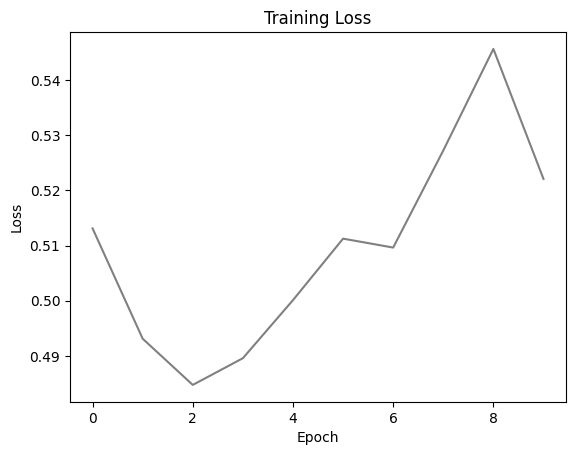

In [21]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

X = df.drop(['Fraud'], axis=1)
y = df['Fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


timesteps = 1  # You might need to adjust this based on the nature of your data
features = 152
output_dim = 1
print(X_train.shape)
X_train_reshaped = X_train.values.reshape(X_train.shape[0], timesteps, features)
print(X_train_reshaped.shape)
model = Sequential()
model.add(LSTM(units=152, input_shape=(timesteps, features)))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=output_dim, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(X_train_reshaped, y_train, epochs=10, batch_size=128, validation_split=0.2)
plt.plot(history.history['loss'],color="gray")
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [22]:
X_test_reshaped = X_test.values.reshape(X_test.shape[0], timesteps, features)
y_pred = model.predict(X_test_reshaped)
y_pred_binary = (y_pred > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Accuracy: {accuracy:.4f}')

# Generate and print classification report
class_report = classification_report(y_test, y_pred_binary)
print('Classification Report:\n', class_report)

# Generate and print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print('Confusion Matrix:\n', conf_matrix)


4154/4154 [==============================] - 22s 5ms/step
Accuracy: 0.7645
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.68      0.74     65985
           1       0.73      0.84      0.78     66915

    accuracy                           0.76    132900
   macro avg       0.77      0.76      0.76    132900
weighted avg       0.77      0.76      0.76    132900

Confusion Matrix:
 [[45091 20894]
 [10398 56517]]
